[0.7        0.69945313 0.69890625 0.69835937 0.6978125  0.69726562
 0.69671875 0.695625   0.69453125 0.6934375  0.69125    0.6890625
 0.686875   0.6825     0.678125   0.67375    0.665      0.65625
 0.6475     0.63875    0.63       0.62125    0.6125     0.60375
 0.595      0.58625    0.5775     0.56875    0.56       0.55125
 0.5425     0.53375    0.525      0.51625    0.5075     0.49875
 0.49       0.48125    0.4725     0.46375    0.455      0.44625
 0.4375     0.42875    0.42       0.41125    0.4025     0.39375
 0.385      0.37625    0.3675     0.35875    0.35       0.34125
 0.3325     0.32375    0.315      0.30625    0.2975     0.28875
 0.28       0.27125    0.2625     0.25375    0.245      0.23625
 0.2275     0.21875    0.21       0.20125    0.1925     0.18375
 0.175      0.16625    0.1575     0.14875    0.14       0.13125
 0.1225     0.11375    0.105      0.09625    0.0875     0.07875
 0.07       0.06125    0.0525     0.04375    0.035      0.02625
 0.0175     0.00875    0.        ]


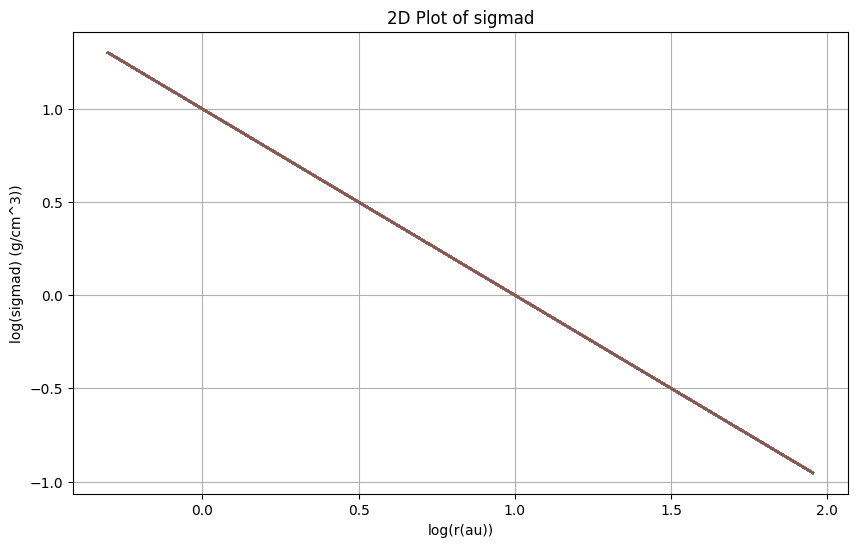

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


In [11]:
import mockmodel as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
zzr   = np.pi/2-tt


rhod  = d.rhodust[:,:,0,0]
temp  = d.dusttemp[:,:,0,0]

In [12]:
# Inspect the array informations in variable
#dtbg_mid, dtbg_sur, dtsm_mid, dtsm_sur all has size(100,200) and only have 0 value seems like
# zzr,rr,tt have size (100,32)

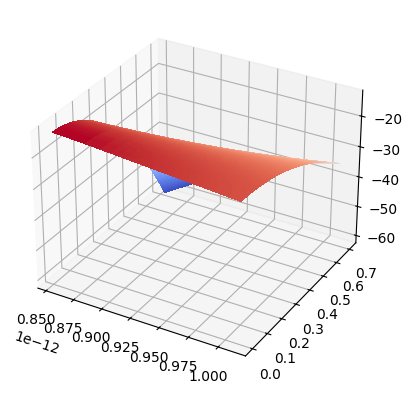

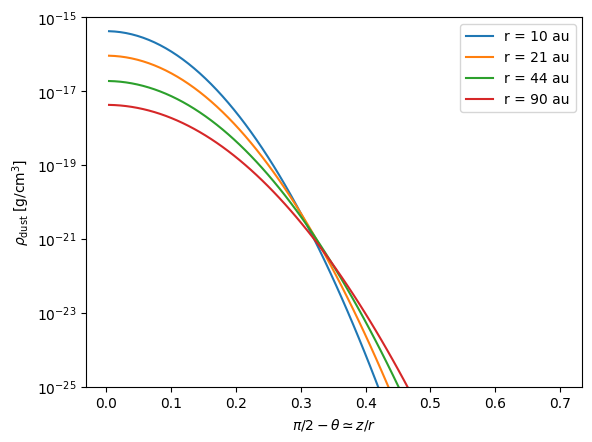

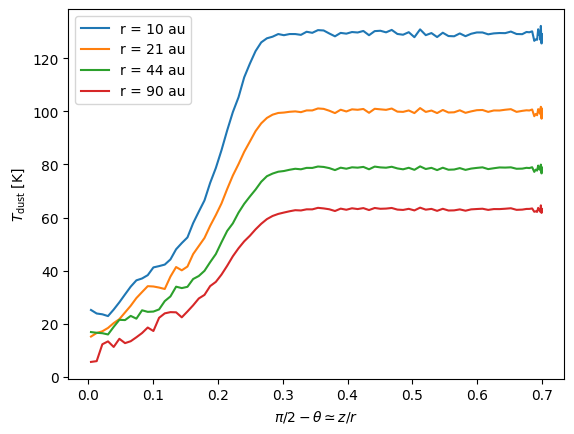

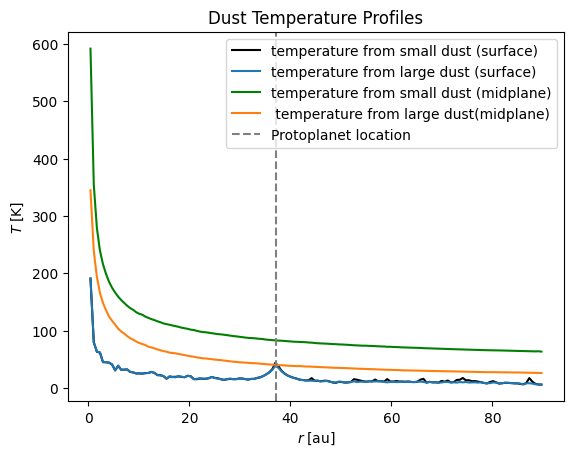

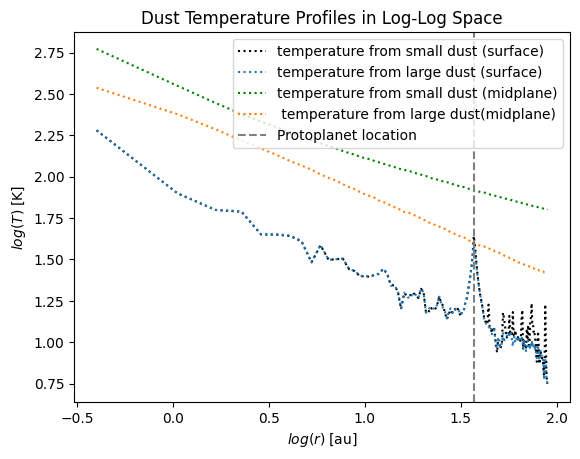

In [13]:


#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,0], '-', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,1], '-', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]),':', label='temperature from small dust (midplane)', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]),':', label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.legend()

plt.show()


In [14]:
print(np.min(d.dusttemp[:, -1, 0, 0]))

5.600162051456866


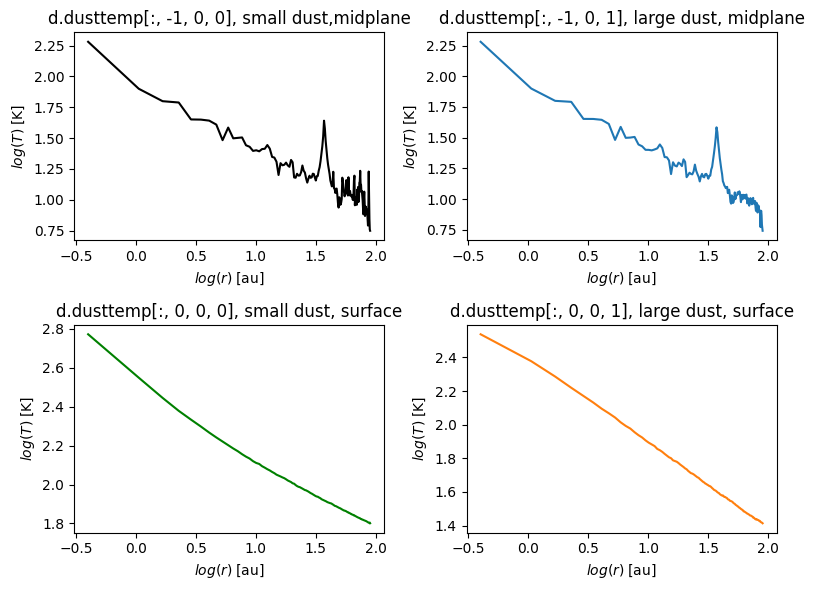

In [15]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), color='black')
axs[0, 0].set_title('d.dusttemp[:, -1, 0, 0], small dust,midplane')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 1]), color='C0')
axs[0, 1].set_title('d.dusttemp[:, -1, 0, 1], large dust, midplane')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 0]), color='green')
axs[1, 0].set_title('d.dusttemp[:, 0, 0, 0], small dust, surface')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 1]), color='C1')
axs[1, 1].set_title('d.dusttemp[:, 0, 0, 1], large dust, surface')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# How temperature changes with z for a given drop r
#I thi
print(d.dusttemp[20, :, 0,0])

[119.9291929  116.52784765 120.22703358 122.10592223 117.92239643
 120.01066747 119.92920241 119.27929645 121.34743613 117.51306395
 117.65971129 116.91779724 120.40410289 120.34003915 119.99010707
 119.72651173 119.57138449 120.35496263 120.00663965 119.98395055
 119.86744809 119.55727892 120.11589454 119.84730739 119.60418195
 118.70891792 119.84692568 118.97950317 119.09932002 120.01582824
 118.626564   119.74572577 119.31037773 121.17566658 118.51315572
 120.02979946 119.49618935 119.37810226 120.93442234 120.1784388
 120.56020854 120.78576606 119.06003551 120.46839888 120.1932053
 120.28486356 119.71723285 119.91270852 118.83683065 119.71105686
 120.79453966 121.04535994 120.02696453 120.22761324 119.2840537
 119.55061527 119.60004321 119.03808824 119.40164225 118.43519064
 117.68106109 115.72477219 113.0439822  108.23162187 103.63273379
  96.96136751  91.68172475  85.36406803  78.76967987  72.80262507
  66.66894246  63.25433137  59.20854972  57.00409452  53.30003528
  48.52807805

The shape of x is (150, 116)
The shape of y is (150, 116)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_35516\152280388.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')


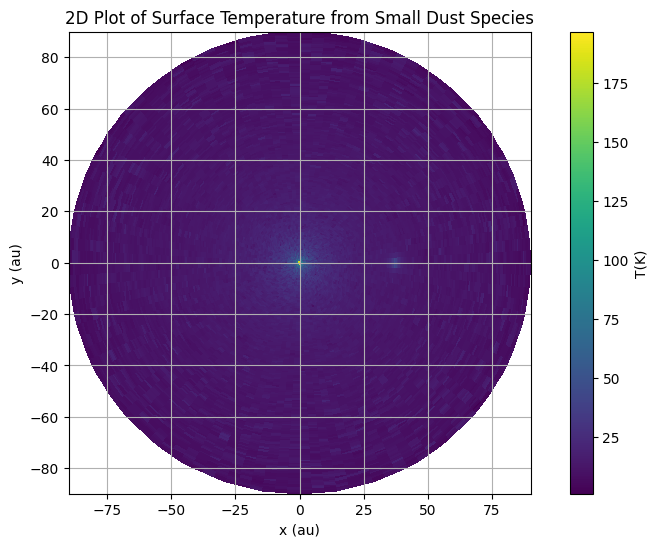

C:\Users\LHEM\AppData\Local\Temp\ipykernel_35516\152280388.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')


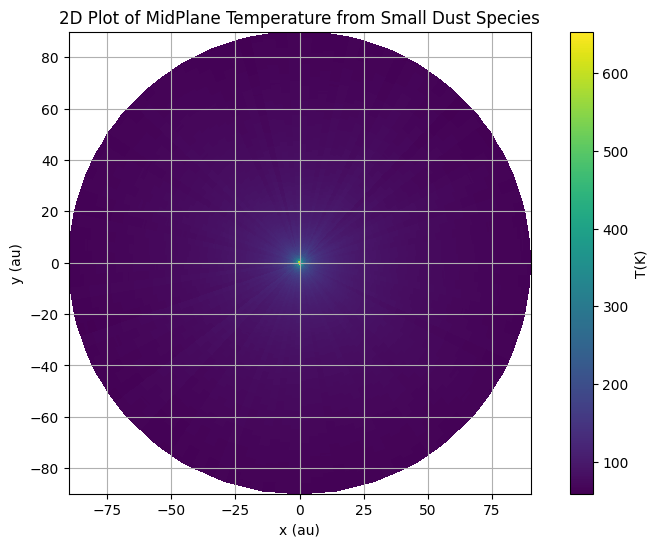

C:\Users\LHEM\AppData\Local\Temp\ipykernel_35516\152280388.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')


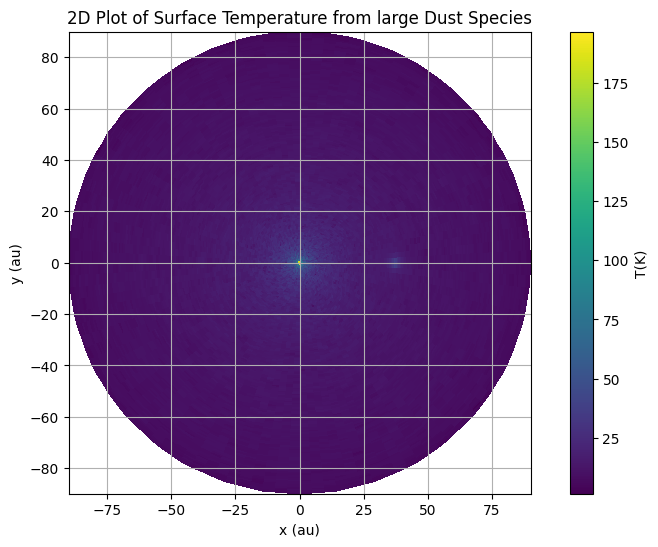

C:\Users\LHEM\AppData\Local\Temp\ipykernel_35516\152280388.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')


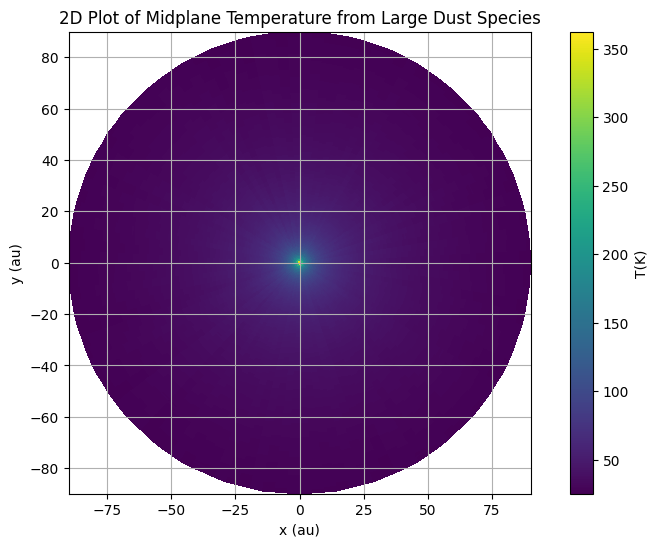

In [17]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, 0, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, -1, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 0, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

# Plot opacity

Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


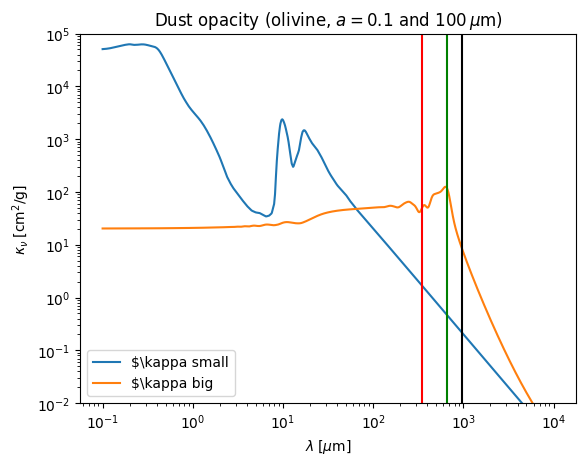

In [10]:

#
# Plot the opacity table
#
#
o1    = readOpac(ext='0.1_micron')
o2    = readOpac(ext='100_micron')
plt.figure()
#plt.loglog(o1.wav[0],o1.kabs[0],label=r'$\kappa_\nu^{\mathrm{abs}}$ (absorption) small',color='C0')
#plt.loglog(o1.wav[0],o1.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) small',color='C0')
plt.loglog(o1.wav[0],o1.kabs[0]+ o1.ksca[0],label=r'$\kappa small',color='C0')
plt.loglog(o2.wav[0],o2.kabs[0]+ o2.ksca[0],label=r'$\kappa big',color='C1')
#plt.loglog(o1.wav[0],o1.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) small',color='C0')
#plt.loglog(o2.wav[0],o2.kabs[0],label=r'$\kappa_\nu^{\mathrm{abs}}$ (absorption) big',color='C1')
#plt.loglog(o2.wav[0],o2.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) big',color='C1')
plt.ylim((1e-2,1e5))
plt.xlabel(r'$\lambda\;[\mu\mathrm{m}]$')
plt.ylabel(r'$\kappa_\nu\;[\mathrm{cm}^2/\mathrm{g}]$')
plt.title(r'Dust opacity (olivine, $a=0.1$ and $100\,\mu\mathrm{m}$)')
plt.axvline(x=345, color = 'red')
plt.axvline(x=652, color='green')
plt.axvline(x=970, color='black')   
plt.legend()

# need calculate optical depth through the CPD？

In [7]:
# Plot the optical depth
# adapted from plot_structure.py in the radmc3d github of run_ppdisk_fargo3d_1_axisymm


sig_d   = []  # store the dust surface densities
opacs   = []  # stores opacity for different dust species

# I have dustopac.inp and dustkappa.inp, don't have dustkapscatmat.inp
# I HAVE scattering opacity, but treated in just the Henyey-Greenstein non-polarized way, not the more realistic 

# I dont think I can do the polarization I need to change the dustkapp to dustscatkappa
with open('dustopac.inp','r') as f:   
    str=f.readline()
    str=f.readline()
    str=f.readline()
    for i in range(a.rhodust.shape[-1]):
        a.getSigmaDust(i)
        sig_d.append(a.sigmadust)   # reads the surface density of the dust species
        str=f.readline()
        str=f.readline()
        str=f.readline()
        ext=str.split()[0]
        o=readOpac(ext=ext,scatmat=False)  # I dont see this .ext entension
        opacs.append(o)
        str=f.readline()
        
values = [7500, 3000, 2000, 1621.62, 1304.35, 869.57, 652.17, 461.54, 344.83]

# Convert to a NumPy array
values_array = np.array(values)
taus    = []
for lam in values_array:
    kappas = []
    for o in opacs:
        kap = np.interp(lam,o.wav[0],o.kabs[0]+o.ksca[0]) # for each awvelength,interpolate the absorption and scattering opacity
        kappas.append(kap)
    tau = np.zeros((len(opacs),a.grid.nx,a.grid.nz))  # initialise the tau (optical depth array)
    for i,s in zip(np.arange(len(sig_d)),sig_d):
        tau[i,:,:] = s*kappas[i]   # tao is the product of surface density and opacity # stacked vertcial already
    taus.append(tau)


# Is kappa per mass of per volume?
# Write the formula for this 
# gcm^-2 (sigmad) * cm^2g^-1 (kappa)?



Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


In [8]:
print(np.shape(a.rhodust))
print(a.rhodust.shape[-1])
print(np.shape(taus))
print(a.grid.nz)

(150, 92, 116, 2)
2
(9, 2, 150, 116)
116


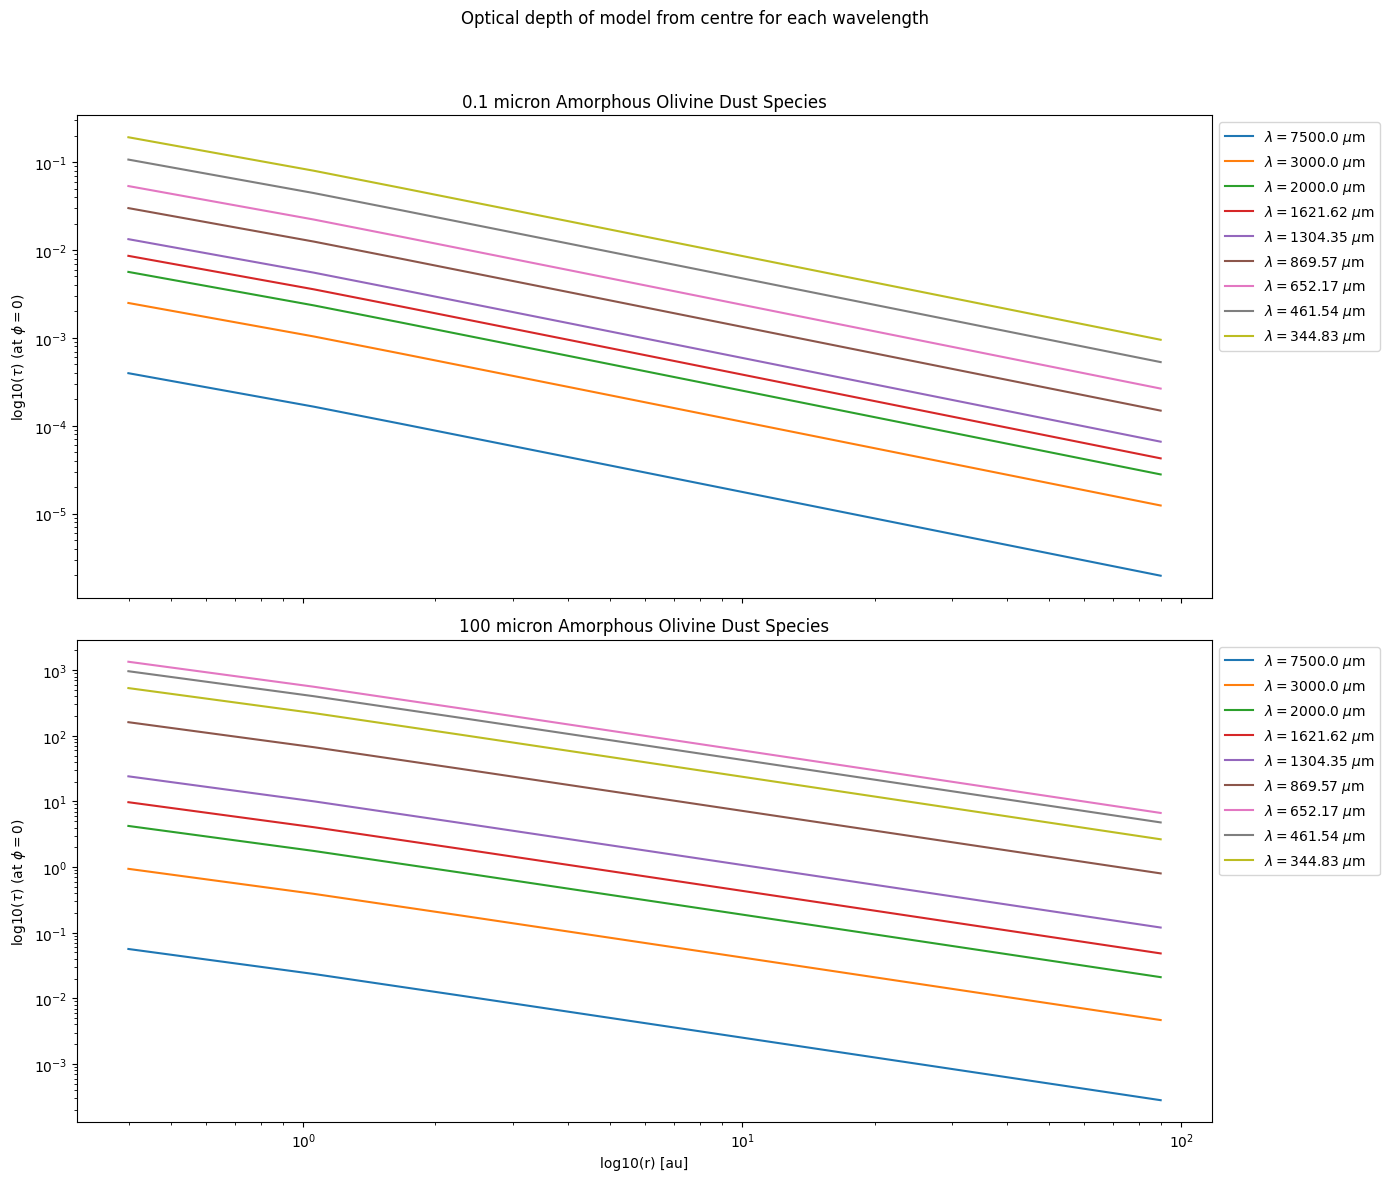

In [18]:

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # Two subplots (1 row, 2 columns)

fig.suptitle('Optical depth of model from centre for each wavelength')
sizelabel = ['0.1 micron','100 micron']
for i in range(len(opacs)):  # Iterate over species
    ax = axes[i]  
    for lam, tau in zip(values_array, taus):
        ax.loglog(a.grid.x / au, tau[i][:, 0],  # phi is 0
                  label=r'$\lambda={}$'.format(lam) + r' $\mu\mathrm{m}$')
    if i ==  1:
        ax.set_xlabel('log10(r) [au]')
    ax.set_ylabel(r'log10($\tau$) (at $\phi=0$)')  # Only label y-axis for the first subplot
    ax.set_title(f'{sizelabel[i]} Amorphous Olivine Dust Species')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [28]:
phi_max = np.arctan(1/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max

print(phi_max, phi_min)

0.02687524808475684 6.2563100590948295


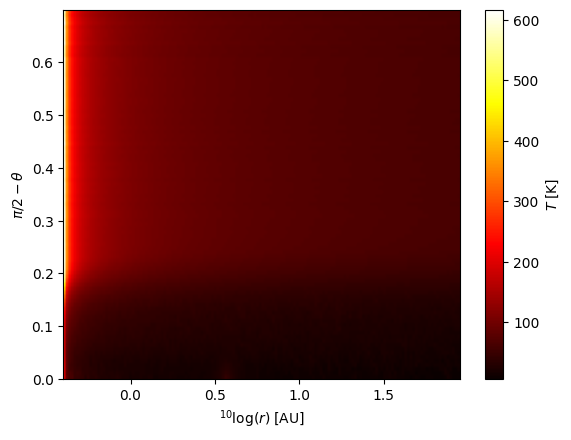

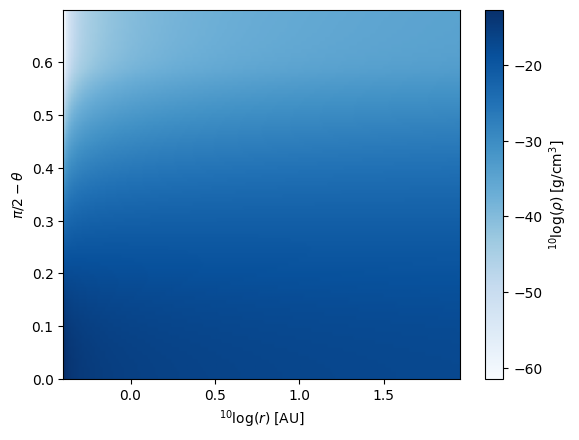

In [ ]:

# plot the density

lgrin  = np.log10(a.grid.x[0]/au)
lgrout = np.log10(a.grid.x[-1]/au)
plt.figure()
plt.imshow(np.log10(a.rhodust[:,:,0,0].T),extent=[lgrin,lgrout,0,np.pi/2-a.grid.y[0]],aspect='auto',cmap=cm.Blues)
plt.xlabel(r'$^{10}\log(r)\; [\mathrm{AU}]$')
plt.ylabel(r'$\pi/2-\theta$')
cbar=plt.colorbar()
cbar.set_label(r'$^{10}\log(\rho)\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.show()